## Python Project
** Analyze Baby Names by State and Year **
* Team: Brooke Kennedy and Jamie Chen

#### Baby Names Class

In [24]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

class BabyNames(object):

	#a) Concatenate all states data together
	def __init__(self, path):
		all_files = glob.glob(os.path.join(path, "*.TXT"))
		df_from_each_file = [pd.read_table(f, sep=',', names=['state','sex','year','name','births']) for f in all_files]
		self.names = pd.concat(df_from_each_file)

	#b)
	def Count(self, state='', year=''):
		names = self.names
		if state != '' and year != '':
			births = names.loc[(names['year'] == year) & (names['state'] == state), 'births'].sum()
		elif state == '' and year != '':
			births = names.loc[names['year'] == year, 'births'].sum()
		elif state != '' and year == '':
			births = names.loc[names['state'] == state, 'births'].sum()
		else:
			births = names['births'].sum()
		return births
		
	#c)
	def Top10BabyNames(self, state='', year=''):
		names = self.names
		if year!='' and state=='':
			f_query = names[(names.year==year) & (names.sex =="F")].groupby(['name'])['births'].sum().reset_index()
			f_10 = f_query.sort_values('births', ascending=False)[:10]['name']
			f_result = [i for i in f_10]
			
			m_query = names[(names.year==year) & (names.sex =="M")].groupby(['name'])['births'].sum().reset_index()
			m_10 = m_query.sort_values('births', ascending=False)[:10]['name']
			m_result = [i for i in m_10]
		
		if year=='' and state!='':
			f_query = names[(names.state==state) & (names.sex =="F")].groupby(['name'])['births'].sum().reset_index()
			f_10 = f_query.sort_values('births', ascending=False)[:10]['name']
			f_result = [i for i in f_10]
			
			m_query = names[(names.state==state) & (names.sex =="M")].groupby(['name'])['births'].sum().reset_index()
			m_10 = m_query.sort_values('births', ascending=False)[:10]['name']
			m_result = [i for i in m_10]
			
		if year=='' and state=='':
			f_query = names[(names.sex =="F")].groupby(['name'])['births'].sum().reset_index()
			f_10 = f_query.sort_values('births', ascending=False)[:10]['name']
			f_result = [i for i in f_10]

			m_query = names[(names.sex =="M")].groupby(['name'])['births'].sum().reset_index()
			m_10 = m_query.sort_values('births', ascending=False)[:10]['name']
			m_result = [i for i in m_10]
			
		if year!='' and state!='':
			f_query = names[(names.state==state) & (names.year==year) &(names.sex =="F")].groupby(['name'])['births'].sum().reset_index()
			f_10 = f_query.sort_values('births', ascending=False)[:10]['name']
			f_result = [i for i in f_10]

			m_query = names[(names.state==state) & (names.year==year) &(names.sex =="M")].groupby(['name'])['births'].sum().reset_index()
			m_10 = m_query.sort_values('births', ascending=False)[:10]['name']
			m_result = [i for i in m_10]
		
			data = {'Rank': [1, 2, 3, 4, 5, 6, 7, 8,9,10],'Male': m_result,'Female': f_result,}
			top_10 = pd.DataFrame(data, columns=['Rank', 'Male', 'Female'])
			print(top_10.to_string(index=False))

	#d)	
	def ChangeOfPopularity(self, fromYear=1910, toYear=2016, top=10):
		names = self.names
		fromquery = names[names.year==fromYear].groupby(['name'])['births'].sum()
		fromquerydf = pd.DataFrame({'name':fromquery.index, 'births':fromquery.values})
		from_births_total = names[names.year==fromYear].births.sum()
		fromquerydf['prop']=fromquerydf.births / from_births_total

		toquery = names[names.year==toYear].groupby(['name'])['births'].sum()
		toquerydf = pd.DataFrame({'name':toquery.index, 'births':toquery.values})
		to_births_total = names[names.year==toYear].births.sum()
		toquerydf['prop']=toquerydf.births / to_births_total

		props = pd.merge(fromquerydf, toquerydf, on='name', how='inner')
		props['pop'] = props['prop_x'] - props['prop_y']
		props = props.sort_values(by=['pop'])	#props is sorted in increasing order based on popularity difference

		#Same popularity
		#Take abs value of change and select smallest
		same = props
		same['pop'] = abs(props['pop'])
		same = same.sort_values(by=['pop'])
		samepop = same['name'].head(top).reset_index(drop = True)
		samepop.index += 1
		print("\nNames having the same popularity between",fromYear,"and",toYear,":")
		print(samepop)

		#Increased popularity
		increased = props['name'].tail(top).reset_index(drop = True)
		increased.index += 1
		print("\nTop",top,"names that increased in popularity between",fromYear,"and",toYear,":")
		print(increased)

		#Decreased popularity
		decreased = props['name'].head(top).reset_index(drop = True)
		decreased.index += 1
		print("\nTop",top,"names that decreased in popularity between",fromYear,"and",toYear,":")
		print(decreased)
	
	#e)
	def Top5NamesPerYear (self, year=2015, sex=''):
		names = self.names
		
		if year!= '' and sex != '':
			select_df = names[(names.year == year)&(names.sex == sex)]
		if year!='' and sex == '':
			select_df = names[names.year == year]
		if year=='':
			print('Please enter a year')
			
		grouped = select_df.groupby(['state'])
		df=[]
		labels = ['state','rank1','num','rank2','num','rank3','num','rank4','num','rank5','num']
		for state, state_df in grouped:
			columns = ['Rank1', 'Num']
			top5 = state_df.sort_values(by=['births'], ascending =False)[:5][['name','births']].values
			df_row = [state]
			df_row.extend([x for y in top5 for x in y])
			df.append(df_row)
			final_df = pd.DataFrame(df,columns = labels)
		print(final_df.to_string(index=False))
		
	#f)	
	def NamePopularityPlot(self, name='Jim', yearRange=(2000,2015), state='IL', sex='M'):
		names = self.names

		qdf = names[(names.name==name) & (names.sex==sex) & (names.state == state) & (names['year'] >= yearRange[0]) & (names['year'] <= yearRange[1])].groupby(['year'])['births'].sum().reset_index()
		total_births = names[(names.state == state) & (names['year'] >= yearRange[0]) & (names['year'] <= yearRange[1])].groupby(['year']).births.sum().reset_index()
		pop = pd.merge(qdf, total_births, on='year', how='outer')
		pop['popularity']=pop['births_x'] / pop['births_y']
		pop['popularity'].fillna(0, inplace=True)
		pop = pop.pivot_table(values='popularity', index=['year'], aggfunc=np.sum)
		
		plt.plot(pop, label = 'Popularity')
		plt.title(name+' Popularity in '+state+' for Years '+str(yearRange[0])+' to '+str(yearRange[1]))
		plt.legend()
		plt.show()

	#g) List top n names that flipped over the years. (i.e. from boy name to girl or the reverse). Provide a plot of the names showing the year. 
	def NameFlip(self, n=10):
		names = self.names
		
		table = names.pivot_table(values='births', index=['name','year'], columns=['sex'], aggfunc=sum).reset_index()
		table = table.fillna(0)
		
		dom = []
		props = []
		for i, row in table.iterrows():
			if int(row['F']) > int(row['M']):
				dom.append('F')
			else:
				dom.append('M')
			props.append(int(row['F'])/(int(row['F'])+int(row['M'])))
			
		table['props'] = props
		table['domsex'] = dom
		del table['F']
		del table['M']
		prev_name = ''
		current_name = ''
		prev_sex = ''
		current_sex = ''
		flip = []
		
		for i, row in table.iterrows():
			prev_name = current_name
			current_name = row['name']
			prev_sex = current_sex
			current_sex = row['domsex']
			if prev_name == current_name and prev_sex != current_sex:
				flip.append(1)
			else:
				flip.append(0)
		table['flips'] = flip

		df = table.groupby(by = ['name'])['flips'].sum().reset_index()
		df = df.sort_values(['flips'], ascending = False).reset_index()
		del df['index']
		df.index += 1
		final = df.head(n)
		print(final)	# print top n flipping names
		
		pfinal = pd.merge(table, final, on='name', how='inner')
		del pfinal['domsex']
		del pfinal['flips_x']
		del pfinal['flips_y']
		fp = pfinal.pivot_table(values='props', index=['year'],columns=['name'], aggfunc=np.sum)
		fp = fp.fillna(0)

		fp.plot(title='Top Gender Flipping Names per Year', figsize=(12, 6), style='-o')
		#fp.plot(title='Top Gender Flipping Names per Year')
		plt.legend(loc='upper right')
		plt.xlabel('Year')
		plt.ylabel('Female Name Proportion')
		plt.hlines(0.5, 1910, 2016)
		plt.show()

#### BabyNames constructor where you pass the file location to create Pandas DataFrame.

In [25]:
name = BabyNames('C:/Users/bck00/Documents/Fall 2017/Java and Python/HW4/babynames')

####  Count (state=’’, year=’’): returns the total number of births. A blank state or year should return all births of the empty input. 

In [26]:
counts = name.Count(state='', year='')
print("Total number of births:",counts)

Total number of births: 305154531


#### Top10BabyNames(state=’IL’, year=2015):

In [27]:
print("Top 10 Baby Names:")
name.Top10BabyNames(state='IL', year=2015)

Top 10 Baby Names:
Rank       Male    Female
   1       Noah    Olivia
   2       Liam      Emma
   3  Alexander    Sophia
   4      Jacob       Mia
   5    Michael  Isabella
   6    William       Ava
   7   Benjamin     Sofia
   8     Daniel   Abigail
   9      Mason     Emily
  10      James    Amelia


#### ChangeOfPopularity (fromYear=2014, toYear=2015, top=10): 
#### This function lists baby names (male or female) that showed change in popularity as follows: 
* Names that increased in popularity 
* Names that decreased in popularity 
* Names having the popularity 

In [28]:
print("Change of Popularity:")
name.ChangeOfPopularity(fromYear=2014, toYear=2015, top=10)

Change of Popularity:

Names having the same popularity between 2014 and 2015 :
1      Altair
2        Eira
3      Amreen
4     Jaionna
5        Xabi
6      Trever
7        Aela
8      Hannia
9      Nayvie
10    Shaheer
Name: name, dtype: object

Top 10 names that increased in popularity between 2014 and 2015 :
1       Michael
2        Alexis
3        Peyton
4        Andrew
5        Joshua
6     Annabelle
7        Sophia
8      Isabella
9          Jase
10       Jayden
Name: name, dtype: object

Top 10 names that decreased in popularity between 2014 and 2015 :
1        Oliver
2         Alexa
3           Mia
4         Hazel
5       Grayson
6        Matteo
7     Charlotte
8         Mateo
9       Lincoln
10     Scarlett
Name: name, dtype: object


####  Top5NamesPerYear(year=2015,sex=’’): Returns a table that show the five most frequent given names, by State, for male, female, or both in a given year.

In [29]:
print("Top 5 Names per Year:")
name.Top5NamesPerYear(year=2015, sex='')

Top 5 Names per Year:
state     rank1   num      rank2   num    rank3   num      rank4   num     rank5   num
  AK    Olivia    56       Liam    53     Emma    49       Noah    48    Aurora    46
  AL   William   412      James   322     John   317        Ava   298     Mason   294
  AR      Emma   214    William   193   Olivia   171     Elijah   171     Mason   170
  AZ    Sophia   472        Mia   461     Emma   450       Noah   445    Olivia   416
  CA    Sophia  2951        Mia  2857     Noah  2759       Emma  2715     Jacob  2551
  CO      Emma   355     Olivia   346     Liam   306    William   275   Jackson   271
  CT    Sophia   216       Noah   215    Mason   211       Emma   203    Olivia   201
  DC   William    78      Henry    75    James    68  Alexander    64     Jacob    62
  DE       Ava    69       Noah    60    Mason    60     Olivia    59      Liam    58
  FL  Isabella  1378       Liam  1275     Noah  1239       Emma  1222    Sophia  1174
  GA   William   729        Ava

#### NamePopularityPlot (name=’Jim’, yearRange=(2000,2015), state=’IL’, sex=’M’): This function will create a plot file that shows the name popularity changes over the year.

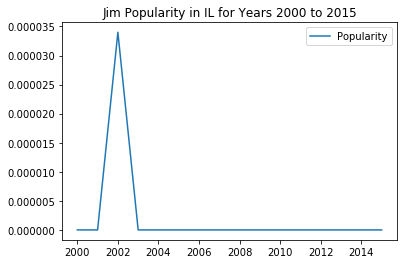

In [30]:
name.NamePopularityPlot(name='Jim', yearRange=(2000,2015), state='IL', sex='M')

#### NameFlip(n=10): List top n names that filliped over the years. (i.e. from boy name to girl or the reverse). Provide a plot of the names showing the year. 

Top flipped names:
         name  flips
1     Lorenza     28
2   Natividad     28
3       Pilar     22
4        Dell     21
5      Nieves     21
6      Michal     20
7      Salome     19
8      Nicola     17
9        Baby     16
10      Marlo     15


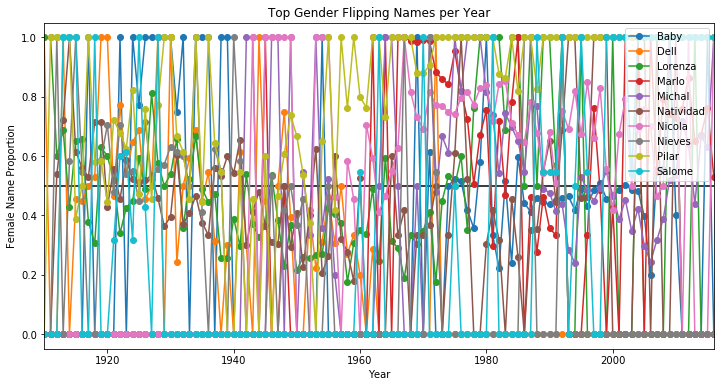

In [31]:
print("Top flipped names:")
name.NameFlip(n=10)